## Project Statement
This project aims to create a model that can tell the difference between fake and real news articles. With the rise of fake news, it's important to have tools that can help identify misinformation quickly. We use a dataset of labeled news articles—real and fake—and apply machine learning techniques, including an LSTM (Long Short-Term Memory) model. The goal is to classify news articles based on their content and potentially reduce the spread of fake news.

### Dataset
We used a dataset from Kaggle, which contains two files: one with true news articles and another with fake ones. We combined these files into one dataset, labeling true news as 1 and fake news as 0. We checked for missing data and explored the dataset to understand its structure. We also used charts to show the balance between true and fake news articles. Additionally, we created word clouds to visualize the most common words in both real and fake news.

#### Key steps:

Added a result column to label real (1) and fake (0) news.
Combined the datasets and shuffled the data to ensure randomness.
Verified that there were no missing values.
Used charts and word clouds to analyze the data.

### Natural Language Processing (NLP)
We prepared the text data for the model using basic NLP techniques. First, we combined the title, text, and subject of each article into one column. Then, we converted the words into numbers (tokenization), and padded the sequences so they all have the same length. This prepared the data for input into our LSTM model.

The LSTM model uses an embedding layer to turn words into dense vectors, followed by an LSTM layer to help understand the order and meaning of the words in each article. This structure makes it suitable for identifying patterns in the text and helps the model classify news articles as real or fake.

In [ ]:
#pip install tensorflow --quiet
#pip install wordcloud --quiet

In [ ]:
#Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers

True News Head:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  result  
0  December 31, 2017        1  
1  December 29, 2017        1  
2  December 31, 2017        1  
3  December 30, 2017        1  
4  December 29, 2017        1  

Fake News Head:
                 

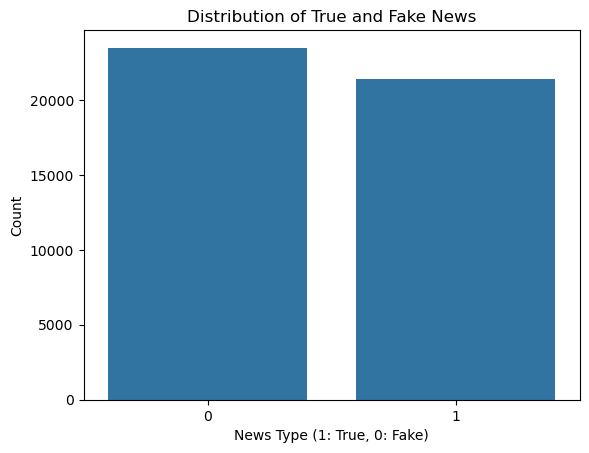

In [ ]:
# Load the datasets
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

# Add a 'result' column to each dataset, 1 for true, 0 for fake
true['result'] = 1
fake['result'] = 0

# Explore the datasets
print("True News Head:")
print(true.head())
print("\nFake News Head:")
print(fake.head())

print("\nTrue News Info:")
print(true.info())
print("\nFake News Info:")
print(fake.info())

# Combine the datasets
df = pd.concat([true, fake], ignore_index=True)

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check for missing values
print("\nMissing Values in Combined DataFrame:")
print(df.isnull().sum())

# Basic statistical summary
print("\nDataset Summary Statistics:")
print(df.describe())

# Check the balance of true and fake news
sns.countplot(x='result', data=df)
plt.title('Distribution of True and Fake News')
plt.xlabel('News Type (1: True, 0: Fake)')
plt.ylabel('Count')
plt.show()

A WordCloud is a visual representation of text data, where:

The size of each word represents its frequency in the dataset.
Larger words appear more frequently, while smaller words appear less often.

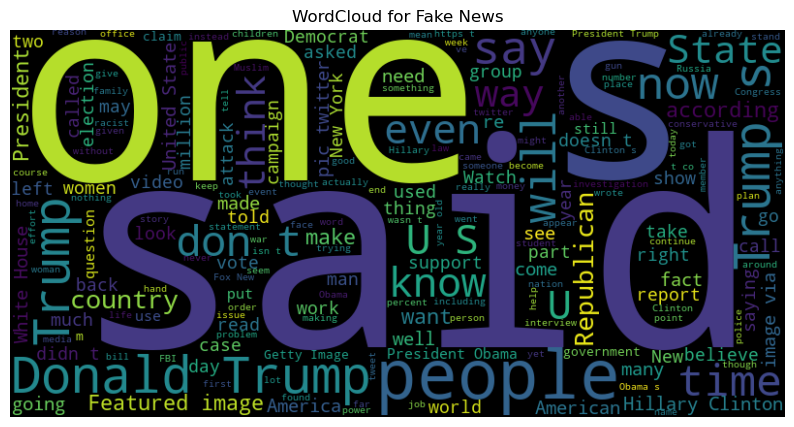

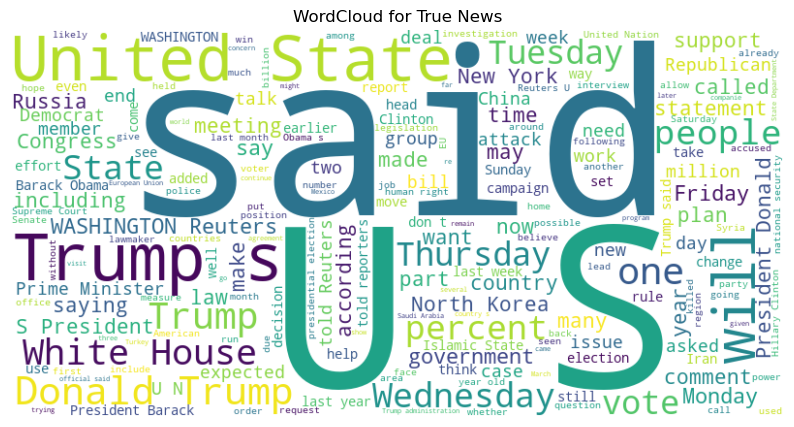

In [ ]:
#Step 5: WordCloud for Fake and True News
# WordCloud for Fake News
fake_text = " ".join(df[df['result'] == 0]['text'].values)
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Fake News")
plt.show()

# WordCloud for True News
true_text = " ".join(df[df['result'] == 1]['text'].values)
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for True News")
plt.show()


In [ ]:
#Step 6: Preprocessing the Text
# Combine title, text, and subject
df['text'] = df['title'] + " " + df['text'] + " " + df['subject']

# Drop unnecessary columns
df.drop(['title', 'date', 'subject'], axis=1, inplace=True)


In [ ]:
#Step 7: Train-Test Split
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], df['result'], test_size=0.2, random_state=42)


In [ ]:
#Step 8: Tokenization and Padding
# Tokenize the data
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Convert text to sequences and pad them
max_length = 500  # Set max length for padding
train_sequences = tokenizer.texts_to_sequences(X_train)
padded_train = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras import layers

# Define the model architecture
model = tf.keras.Sequential([
    layers.Embedding(input_dim=10000, output_dim=128, input_length=500),  # Embedding layer
    layers.SpatialDropout1D(0.2),  # Dropout to prevent overfitting
    layers.LSTM(128, return_sequences=True),  # LSTM layer
    layers.GlobalMaxPool1D(),  # Pooling to reduce dimensionality
    layers.Dense(128, activation='relu'),  # Dense layer with ReLU activation
    layers.Dropout(0.2),  # Another dropout layer
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show the model summary
model.summary()


C:\Users\Mitra   Nouri\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Show the model summary
model.summary()

# Train the model
history = model.fit(padded_train, np.array(Y_train), epochs=1, batch_size=32, validation_data=(padded_test, np.array(Y_test)))

# Evaluate the model on test data
loss, accuracy = model.evaluate(padded_test, np.array(Y_test))

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

1123/1123 ━━━━━━━━━━━━━━━━━━━━ 328s 288ms/step - accuracy: 0.9292 - loss: 0.1521 - val_accuracy: 0.9991 - val_loss: 0.0027
281/281 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.9994 - loss: 0.0025
Test Loss: 0.0027111470699310303
Test Accuracy: 0.999109148979187


281/281 ━━━━━━━━━━━━━━━━━━━━ 24s 86ms/step
Confusion Matrix:
[[4647    3]
 [   5 4325]]

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4650
        True       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



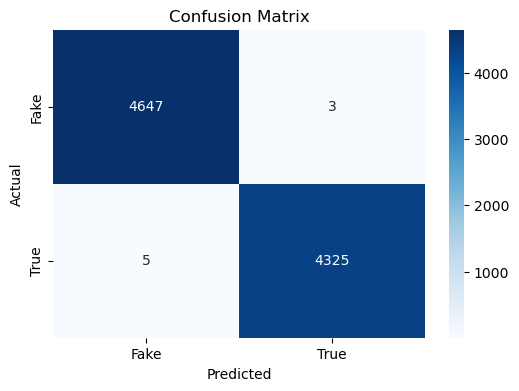

In [ ]:
# Make predictions on the test set
predictions = (model.predict(padded_test) > 0.5).astype("int32")

# Confusion matrix
cm = confusion_matrix(Y_test, predictions)
print("Confusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, predictions, target_names=["Fake", "True"]))

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
